# Visual Explanatory Analysis of Lyft Bay Wheels Data

Here I will sumarise the main findings of my analyses with well-designed graphs.

**Loading the data**

In [62]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# load data
df = pd.read_csv('202001-baywheels-tripdata_cleaned.csv')

C:\Users\zech011\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Bay Wheels bike usage across the month of January 2020

First, let's look at how many rides were done for each day of January.

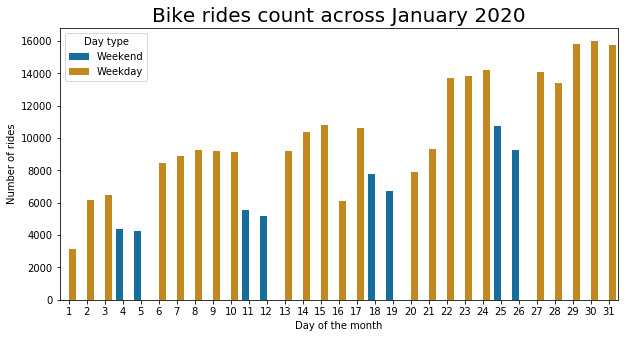

In [63]:
plt.figure(figsize = [10, 5])

base_color = sb.color_palette()[0]
sb.countplot(data=df, x='start_day', color=base_color, hue='weekday', palette='colorblind')
plt.title('Bike rides count across January 2020', fontsize=20)
plt.legend(['Weekend', 'Weekday'], title='Day type');
plt.xlabel('Day of the month')
plt.ylabel('Number of rides');

Findings:
1. Bike usage generaly increases across the days in January. This is possibly due to vacations - many people tend to be travelling in the beginning of the year.
2. With a few exceptions (e.g. the 1st, 16th, and 20-21st) we can see that there seems to be a drop in ride counts during weekends.



Let's confirm point #1 above

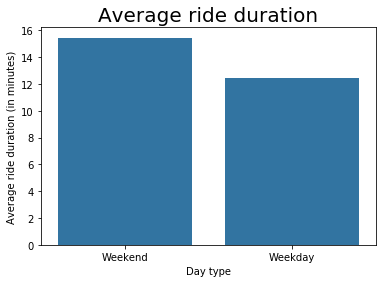

In [69]:
# extract averages
df_weekday_means = df.groupby('weekday').mean()
df_weekday_means = df_weekday_means.duration_min.reset_index(name='avg_duration')
df_weekday_means['weekday'].replace({False: 'Weekend', True: 'Weekday'}, inplace=True)

# plot the averages
sb.barplot(data=df_weekday_means, x='weekday', y='avg_duration', color=sb.color_palette()[0])
plt.title('Average ride duration', fontsize=20)
plt.xlabel('Day type')
plt.ylabel('Average ride duration (in minutes)');



This confirms that **bike rides are shorter during weekdays**.



**But why could it be that people tend to use bikes more during the week and for shorter periods? What could explain that?**

To answer that, it helps looking at the distribution of ride count over time for weekends and weekdays.

## Daily bike usage distribution

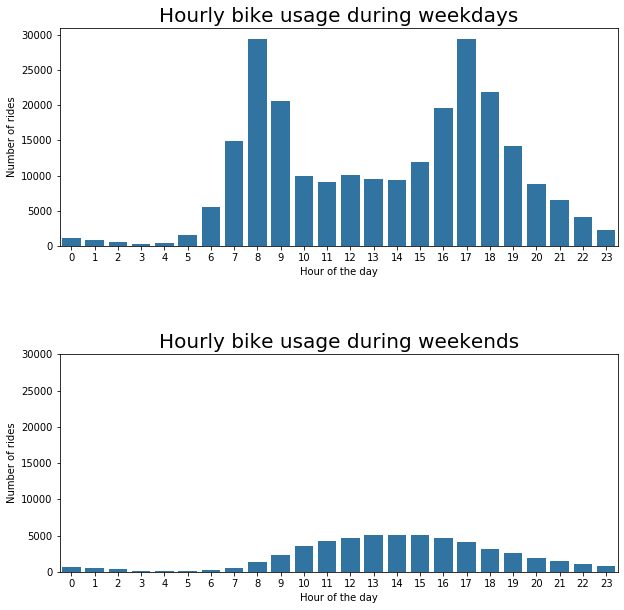

In [25]:
# plot bar charts of usage count according to hour of the day
plt.figure(figsize = [10, 10])
plt.subplots_adjust(hspace=.5)

# get dataframe for weekdays only and plot it
df_weekdays = df[df.weekday == True]

plt.subplot(2,1,1)
base_color = sb.color_palette()[0]
sb.countplot(data=df_weekdays, x='start_hour', color=base_color)
plt.title('Hourly bike usage during weekdays', fontsize=20)
plt.xlabel('Hour of the day')
plt.ylabel('Number of rides');


# get dataframe for weekends only and plot it
df_weekends = df[df.weekday == False]

plt.subplot(2,1,2)
base_color = sb.color_palette()[0]
sb.countplot(data=df_weekends, x='start_hour', color=base_color)
plt.title('Hourly bike usage during weekends', fontsize=20);
plt.xlabel('Hour of the day')
plt.ylabel('Number of rides')
plt.ylim(0, 30000);

By looking at the hourly bike usage we can discover a very telling insight: during weekdays, bike usage is concentrated during peak times when people are going to work (7-9am) and when they are comming back from work (4-6pm).

**Therefore, bike usage for commuting reasons seems to be very significant for the platform.**

And who could these commuters be? Here it helps looking at the different user types of the platform.

## Insights from user demographics comparisons

There are two main types of users according to Lyft: 
- 'Customers' who are casual users who pay for each individual ride.
- 'Subscribers' who are more 'heavy users' and pay a monthly subscription, being able to use the platform as much as they want.

So let's look at how these differ.

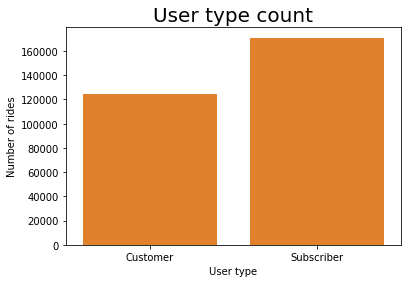

In [44]:
base_color = sb.color_palette()[1]
sb.countplot(data=df, x='user_type', color=base_color)
plt.title('User type count', fontsize=20);
plt.xlabel('User type')
plt.ylabel('Number of rides');

Here we can see that **there are more rides from the category of subscribers than from casual users**.

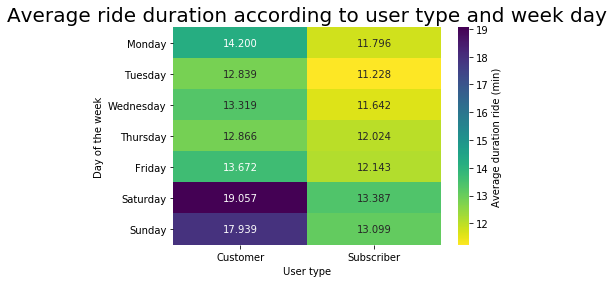

In [38]:
# order weekdays
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered= True, categories = week_order)
df['dayofweek'] = df['dayofweek'].astype(ordered_cat)

# get dataframe with average ride duration for dayofweek vs. user_type
df_means = df.groupby(['user_type', 'dayofweek'])['duration_min'].mean()
df_means = df_means.unstack(level=0)
df_means

#plot heatmap
sb.heatmap(df_means, annot = True, fmt = '.3f', 
           cbar_kws = {'label':'Average duration ride (min)'}, cmap = 'viridis_r')
plt.title('Average ride duration according to user type and week day', fontsize=20);
plt.xlabel('User type')
plt.ylabel('Day of the week');

The graph above shows that **Subscribers tend to have shorter rides than Customers/casual users**.

Finally let's look at when these users most use the platform

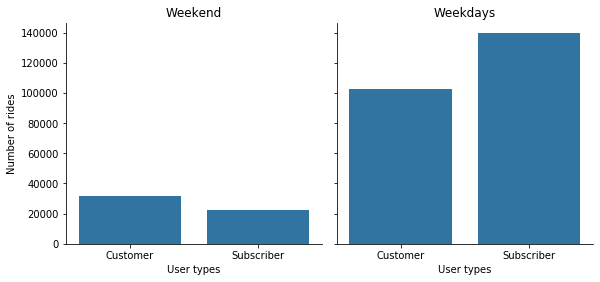

In [42]:
# plot count of rides according to customer and weekday/weekend
g = sb.FacetGrid(data = df, col = 'weekday', size = 4, col_wrap=3)
g.map(sb.countplot, 'user_type')

axes = g.axes.flatten()
axes[0].set_title("Weekend")
axes[1].set_title("Weekdays")

axes = g.axes.flatten()
axes[0].set_ylabel("Number of rides")
for ax in axes:
    ax.set_xlabel("User types");

From the above we can see that **subscribers tend to use the platform during weekdays more than customers**. 

Also, customers use the platform more during weekends, which, together with the fact that they ride longer in weekends, confirms that they are "casual" users who use the platform probably more for leasure reasons than subscribers.

To summarise: 
- Bike rides tend to happen more during weekdays and tend to be shorter than during weekends.
- During weekdays, they are strongly concentrated at times in which people are commuting to and from work, suggesting that commuters are an important segment of the market.
- These commuters seem to be more represented by the 'Subscriber' type of user, who also ride the bikes more often at weekdays and for shorter periods. They also have the biggest share of overal rides in the platform.

With further analyses to more confidently prove that subscribers tend to be in fact commuters, the **business relevance** of these findings could be that the company should focus on offering services and products better tailored to commuters.


In [ ]:
!jupyter nbconvert explanatory_analysis.ipynb --to slides --post serve --template output_toggle